In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from salishsea_tools import viz_tools,tidetools

%matplotlib inline

In [2]:
grid = '/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc'
fB = nc.Dataset(grid)
bathy=fB.variables['Bathymetry'][:]
X = fB.variables['nav_lon'][:]
Y=fB.variables['nav_lat'][:]


In [3]:
lat36 = 50.135820
lon36 = -125.353403

j36, i36 = tidetools.find_closest_model_point(lon36, lat36, X, Y, bathy)
print i36, j36



120 774


[110, 150, 750, 790]

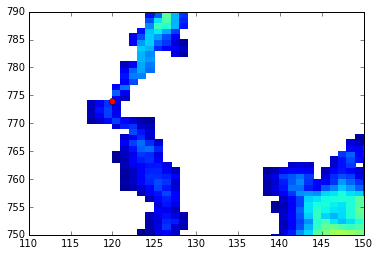

In [4]:
plt.pcolormesh(bathy)
plt.plot(i36,j36,'ro')
plt.axis([110,150,750,790])

Very close to the land. How does the U/V grid look?

0.404824
--


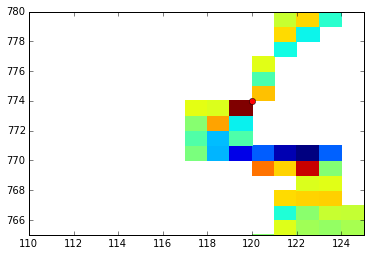

In [5]:
ufil='/data/dlatorne/MEOPAR/SalishSea/nowcast/24jan15/SalishSea_1d_20150124_20150124_grid_U.nc'
fU = nc.Dataset(ufil)
U = fU.variables['vozocrtx']
U=np.ma.masked_values(U[0,0,:,:],0)

plt.pcolormesh(U)
plt.plot(i36,j36,'ro')
plt.axis([110,125,765,780])

print U[j36,i36]
print U[j36,i36-1]

U masked at the unstagger point. So this index is no good for tidal currents.

0.417577
0.248107


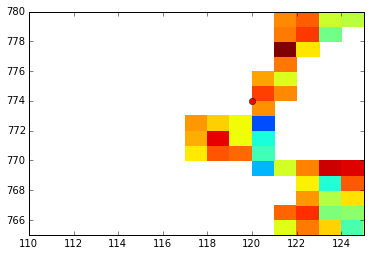

In [6]:
vfil='/data/dlatorne/MEOPAR/SalishSea/nowcast/24jan15/SalishSea_1d_20150124_20150124_grid_V.nc'
fV = nc.Dataset(vfil)
V = fV.variables['vomecrty']
V=np.ma.masked_values(V[0,0,:,:],0)

plt.pcolormesh(V)
plt.plot(i36,j36,'ro')
plt.axis([110,125,765,780])

print V[j36,i36]
print V[j36-1,i36]

Adjust i,j until we find a point that works...

In [7]:

inew=i36-1
jnew=j36-2
print inew, jnew



119 772


-0.336431
0.467699


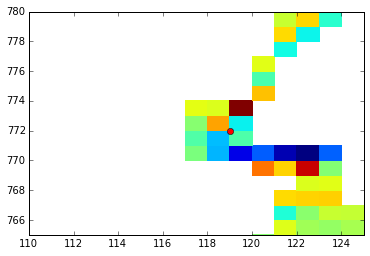

In [8]:
ufil='/data/dlatorne/MEOPAR/SalishSea/nowcast/24jan15/SalishSea_1d_20150124_20150124_grid_U.nc'
fU = nc.Dataset(ufil)
U = fU.variables['vozocrtx']
U=np.ma.masked_values(U[0,0,:,:],0)

plt.pcolormesh(U)
plt.plot(inew,jnew,'ro')
plt.axis([110,125,765,780])

print U[jnew,inew]
print U[jnew,inew-1]

0.0286868
0.0204337


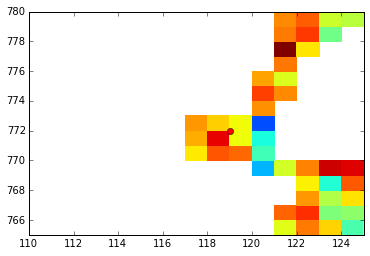

In [9]:
vfil='/data/dlatorne/MEOPAR/SalishSea/nowcast/24jan15/SalishSea_1d_20150124_20150124_grid_V.nc'
fV = nc.Dataset(vfil)
V = fV.variables['vomecrty']
V=np.ma.masked_values(V[0,0,:,:],0)

plt.pcolormesh(V)
plt.plot(inew,jnew,'ro')
plt.axis([110,125,765,780])

print V[jnew,inew]
print V[jnew-1,inew]

In [10]:
print X[jnew,inew], X[j36,i36]
print Y[jnew,inew], Y[j36,i36]
print bathy[jnew,inew], bathy[j36,i36]

-125.350700378 -125.352050781
50.1259269714 50.1356124878
84.0 54.25


[110, 125, 765, 780]

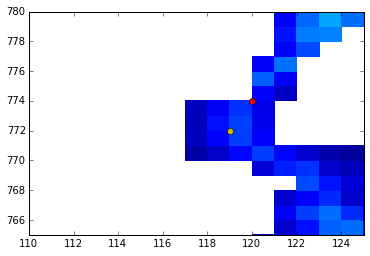

In [11]:
plt.pcolormesh(bathy)
plt.plot(i36,j36,'ro')
plt.plot(inew,jnew,'yo')
plt.axis([110,125,765,780])